In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
import requests
import os

In [3]:
import logging


def make_logger(name: str) -> logging.Logger:

    log = logging.getLogger(name)

    if not log.hasHandlers():
        DEBUGLEVEL = os.getenv("DEBUG_LEVEL", "DEBUG")
        log.disabled = os.getenv("LOG_ON", "True") == "False"

        log.setLevel(getattr(logging, DEBUGLEVEL))

        logging.basicConfig(
            format="[%(asctime)s]::[%(name)s]::[%(levelname)s]::%(message)s", datefmt="%D # %H:%M:%S"
        )

    return log

log = make_logger(__name__)

In [4]:
log.warning(msg=f'warning message')
log.info(msg=f'info message')
log.debug(msg=f'debug message')
log.error(msg=f'error message')
log.critical(msg=f'fatal message')

[04/24/22 # 14:18:07]::[__main__]::[WARNING]::warning message
[04/24/22 # 14:18:07]::[__main__]::[INFO]::info message
[04/24/22 # 14:18:07]::[__main__]::[DEBUG]::debug message
[04/24/22 # 14:18:07]::[__main__]::[ERROR]::error message
[04/24/22 # 14:18:07]::[__main__]::[CRITICAL]::fatal message


In [5]:
def download_file(url: str, local_filename: str = None, overwrite: bool = False) -> str:
    if not local_filename: *_, local_filename = url.split("/")

    if not overwrite and os.path.isfile(local_filename):
        log.info(msg=f"File already exists: {local_filename}")
        return local_filename

    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, "wb+") as f:
            for chunk in r.iter_content():
                f.write(chunk)

    log.info(msg=f'File saved at {local_filename}')
    return local_filename

In [6]:
dataset_path = download_file('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')

[04/24/22 # 14:18:08]::[__main__]::[INFO]::File already exists: wdbc.data


In [10]:
from itertools import chain

In [11]:
features = ('radius', 'texture', 'peri', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dim')

features = chain(map(lambda x: f'{x}_mean', features), map(lambda x: f'{x}_se', features), map(lambda x: f'{x}_worst', features))
features = tuple(features)

header = chain(('id', 'diag'), features)
header = tuple(header)

In [12]:
numeric_features = features

In [13]:
raw_data = pd.read_csv(dataset_path, header=None, names=header)
raw_data.drop(columns='id', inplace=True)

In [14]:
raw_data

,diag,radius_mean,texture_mean,peri_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,peri_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dim_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


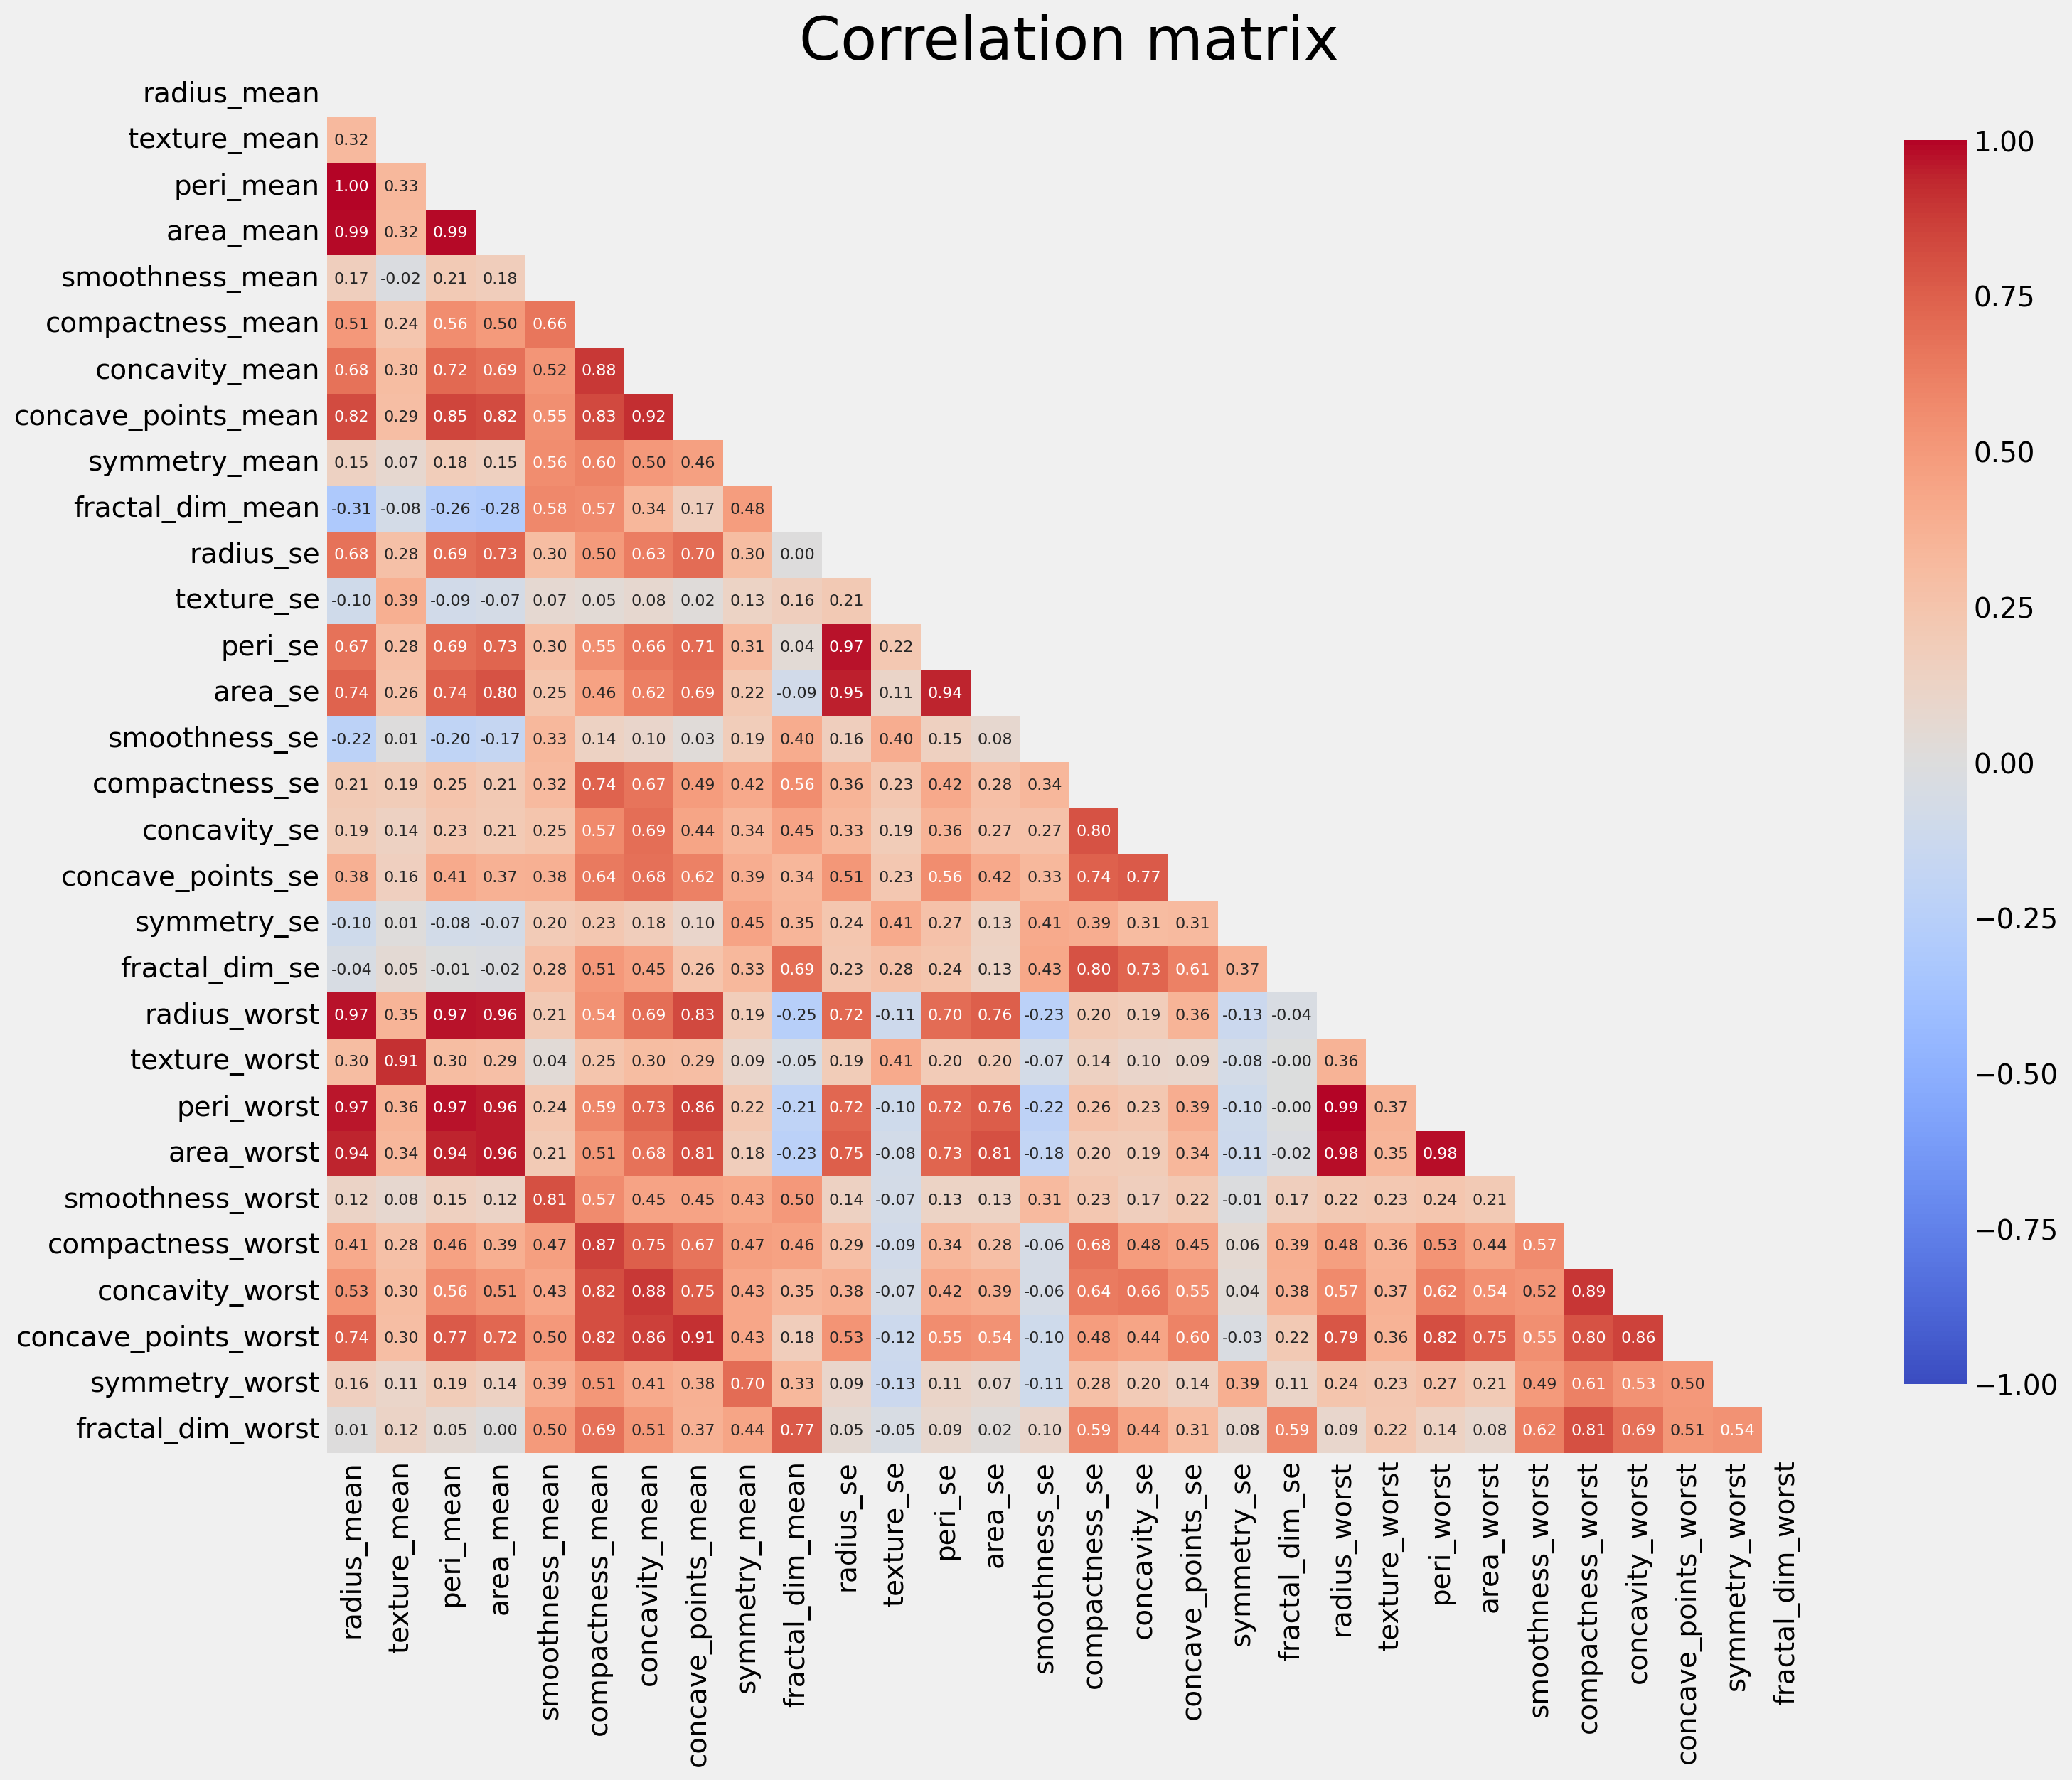

In [15]:
cm = raw_data.corr()
mask = np.triu(np.ones_like(cm, dtype=bool))

fig = plt.figure(figsize=(15, 12), dpi=200)
sns.heatmap(cm, mask=mask, vmax=1.0, vmin=-1.0, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size":8}, cbar_kws={"shrink": .9})
plt.title('Correlation matrix', fontsize=30)
plt.show()

<Figure size 1080x1080 with 0 Axes>

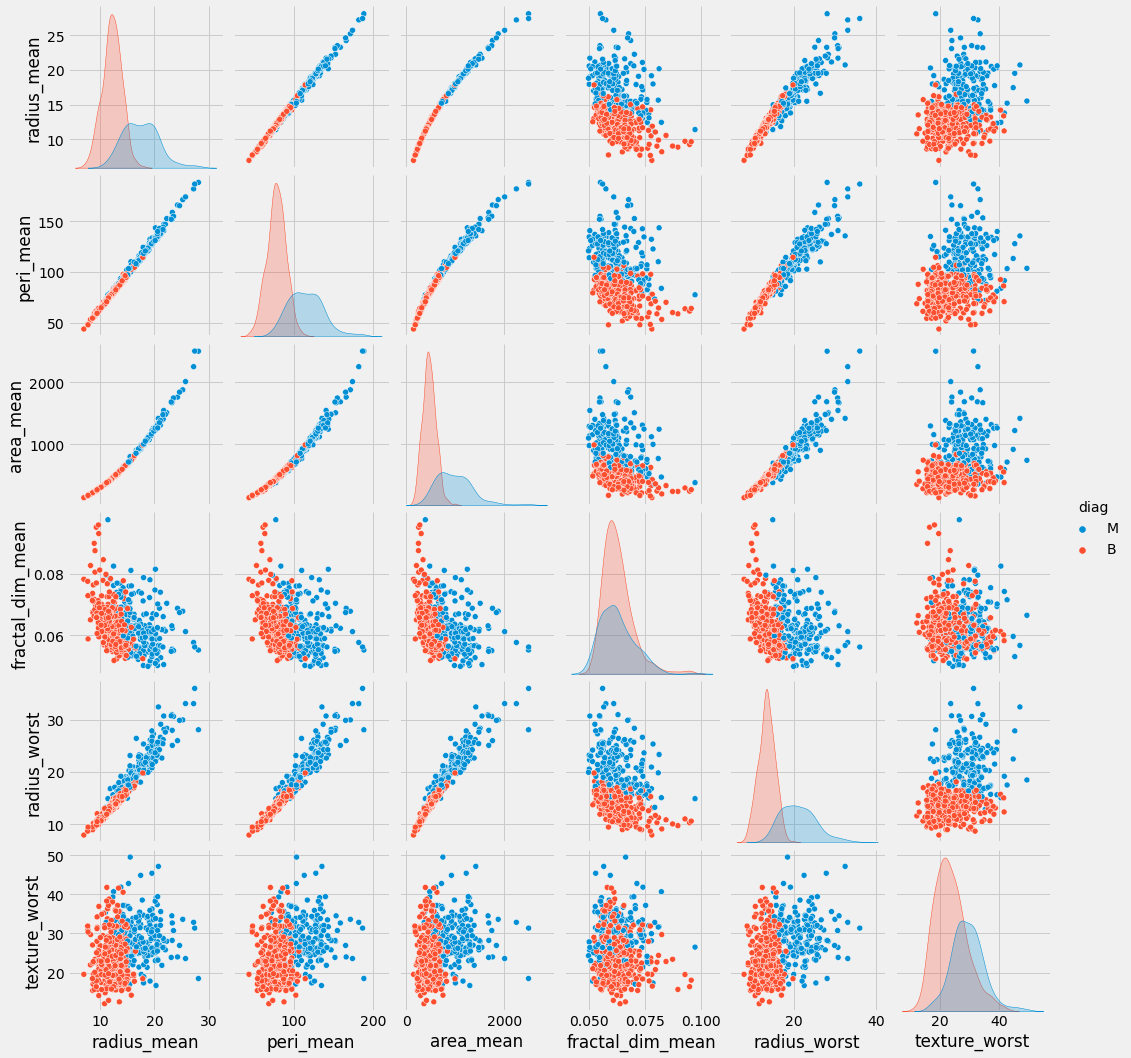

In [16]:
pairplot_vars = ['radius_mean', 'peri_mean', 'area_mean', 'fractal_dim_mean', 'radius_worst', 'texture_worst']

plt.figure(figsize=(15, 15))
sns.pairplot(raw_data, hue='diag', vars=pairplot_vars)
plt.show()

In [17]:
features = raw_data.drop(columns='diag')
target = raw_data.diag.replace({'M': 1, 'B': 0})

In [18]:
features

,radius_mean,texture_mean,peri_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dim_mean,...,radius_worst,texture_worst,peri_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dim_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
peri_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dim_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [40]:
def split_data(features, target, test_split_ratio, random_state=42):
    train_features, test_features, train_target, test_target = train_test_split(
        features, target, test_size=test_split_ratio, random_state=random_state
    )

    return (train_features, train_target), (test_features, test_target)


(x_train, y_train), (x_test, y_test) = split_data(features, target, test_split_ratio=0.25, random_state=42)

In [32]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [55]:
def make_confusion_matrix(y_true, y_pred, estimator_name: str) -> pd.DataFrame:
    metrics = pd.DataFrame(
        data=[[estimator_name, accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)]], 
        columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

    cm = confusion_matrix(y_true, y_pred)
    disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
    plt.title(estimator_name, pad=20, fontsize=0, fontweight="bold")
    plt.show()

    return metrics

In [41]:
x_train.shape, y_train.shape

((426, 30), (426,))

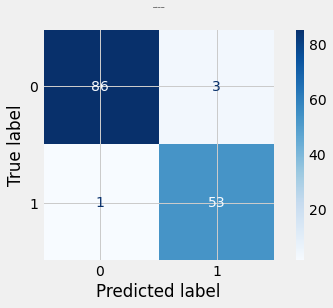

[04/24/22 # 14:36:31]::[__main__]::[INFO]::
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.972028   0.946429  0.981481  0.963636


In [62]:
pl = make_pipeline(
    make_column_transformer(
        (StandardScaler(), numeric_features)
    ),
    LogisticRegression(
        penalty='elasticnet', l1_ratio=0.8, random_state=42,
        solver='saga', warm_start=False, max_iter=1500
    )
)

pl.fit(x_train, y_train)
test_pred = pl.predict(x_test)

log.info(msg=f'\n{make_confusion_matrix(y_test, test_pred, "Logistic Regression")}')

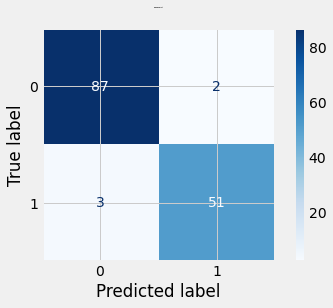

[04/24/22 # 14:36:35]::[__main__]::[INFO]::
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.965035   0.962264  0.944444  0.953271


In [63]:
pl = make_pipeline(
    make_column_transformer(
        (StandardScaler(), numeric_features)
    ),
    RandomForestClassifier(
        n_estimators=50, criterion='gini',
        max_depth=3, max_features='sqrt',
        bootstrap=True, random_state=42
    )
)

pl.fit(x_train, y_train)
test_pred = pl.predict(x_test)

log.info(msg=f'\n{make_confusion_matrix(y_test, test_pred, "Random Forest")}')